# 7.4.5b Análisis de componentes principales (PCA)

**Maldición de la dimensionalidad:** $\;$ muchas técnicas de aprendizaje automático empeoran sensiblemente con datos de alta dimensión

**Reducción de la dimensión:** $\;$ dada una matriz de $N$ datos en un espacio de alta dimensión, $\,\mathbb{R}^D,\,$ queremos aprender (no supervisadamente) una transformación de $\,\mathbb{R}^D\,$ en un espacio de dimensión reducida, $\,\mathbb{R}^K, K\ll D,\,$ que produzca una "buena aproximación" de los datos originales

**Codificación:** $\;$ operación de reducción de la dimensión, $\,\operatorname{encode}(\boldsymbol{x})=\boldsymbol{z},\,\boldsymbol{x}\in\mathbb{R}^D\,$ y $\,\boldsymbol{z}\in\mathbb{R}^K$

**Decodificación:** $\;$ operación de reconstrucción del dato original, $\,\operatorname{decode}(\boldsymbol{z})=\hat{\boldsymbol{x}},\,\hat{\boldsymbol{x}}\in\mathbb{R}^D\,$ y $\,\boldsymbol{z}\in\mathbb{R}^K$

**Análisis de componentes principales (PCA):** $\;$ escoge una proyección lineal ortogonal $\,\mathbf{W}\in\mathbb{R}^{D\times K}\,$ de mínima **distorsión o error de reconstrucción**
$$\mathcal{L}(\mathbf{W})=\frac{1}{N}\sum_n\lVert\boldsymbol{x}_n-\operatorname{decode}(\operatorname{encode}(\boldsymbol{x}_n))\rVert_2^2%
\qquad\text{con}\quad%
\operatorname{encode}(\boldsymbol{x})=\mathbf{W}^t\boldsymbol{x}%
\quad\text{y}\quad%
\operatorname{decode}(\boldsymbol{z})=\mathbf{W}\boldsymbol{z}$$

**Ejemplo:** $\;$ conjunto de $N=4$ bidimensionales que queremos reducir a unidimensionales con distorsión

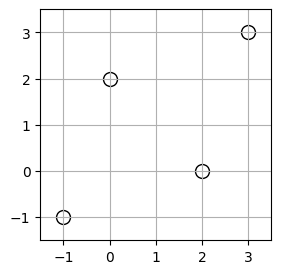

In [1]:
import numpy as np; import matplotlib.pyplot as plt
X = np.array([ [-1, -1], [0, 2], [2, 0], [3, 3] ]); N = len(X); fig, ax = plt.subplots(figsize=(3, 3))
ax.set_aspect("equal"); plt.axis([-1.5, 3.5, -1.5, 3.5]); plt.grid(True)
plt.scatter(*X.T, facecolor='white', edgecolor='k', s=100);

**Ejercicio:** $\;$ codifica, decodifica y halla la distorsión de los datos del ejemplo con $\mathbf{W}=(1, 0)^t$
$$\begin{align*}
\boldsymbol{x}_1&=(-1,-1)^t&\boldsymbol{x}_2&=(0,2)^t&\boldsymbol{x}_3&=(2,0)^t&\boldsymbol{x}_4&=(3,3)^t\\
z_1&=\mathbf{W}^t\boldsymbol{x}_1=-1&z_2&=0&z_3&=2&z_4&=3\\
\hat{\boldsymbol{x}}_1&=\mathbf{W}z_1=(-1,0)^t&\hat{\boldsymbol{x}}_2&=(0,0)^t&\hat{\boldsymbol{x}}_3&=(2,0)^t&\hat{\boldsymbol{x}}_4&=(3,0)^t
\end{align*}$$
$$\mathcal{L}(\mathbf{W})=\frac{1}{4}\left(\lVert\boldsymbol{x}_1-\hat{\boldsymbol{x}}_1\rVert_2^2+\lVert\boldsymbol{x}_2-\hat{\boldsymbol{x}}_2\rVert_2^2+\lVert\boldsymbol{x}_3-\hat{\boldsymbol{x}}_3\rVert_2^2+\lVert\boldsymbol{x}_4-\hat{\boldsymbol{x}}_4\rVert_2^2\right)%
=\frac{1}{4}\left(1+4+0+9\right)=\frac{14}{4}=3.5$$

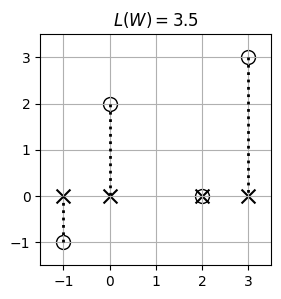

In [2]:
import numpy as np; import matplotlib.pyplot as plt; from matplotlib.collections import LineCollection
X = np.array([ [-1, -1], [0, 2], [2, 0], [3, 3] ]); N = len(X); fig, ax = plt.subplots(figsize=(3, 3))
ax.set_aspect("equal"); plt.axis([-1.5, 3.5, -1.5, 3.5]); plt.grid(True)
plt.scatter(*X.T, facecolor='white', edgecolor='k', s=100)
K = 1; W = np.array([1, 0]).reshape(-1, K); Z = (X @ W).reshape(-1, K); hX = Z @ W.T
L = np.square(X - hX).sum(axis=1).mean(); ax.set_title(f'$L(W)={L}$')
plt.scatter(*hX.T, facecolor='black', s=100, marker='x')
lines = np.zeros((N, 2, 2)); lines[:, 0, :] = X; lines[:, 1, :] = hX
ax.add_collection(LineCollection(lines, linewidths=2, colors='black', linestyle='dotted'));

**Ejercicio:** $\;$ codifica, decodifica y halla la distorsión de los datos del ejemplo con $\mathbf{W}=(\sqrt{2}/2, \sqrt{2}/2)^t$
$$\begin{align*}
\boldsymbol{x}_1&=(-1,-1)^t&\boldsymbol{x}_2&=(0,2)^t&\boldsymbol{x}_3&=(2,0)^t&\boldsymbol{x}_4&=(3,3)^t\\
z_1&=\mathbf{W}^t\boldsymbol{x}_1=-\sqrt{2}&z_2&=\sqrt{2}&z_3&=\sqrt{2}&z_4&=3\sqrt{2}\\
\hat{\boldsymbol{x}}_1&=\mathbf{W}z_1=(-1,-1)^t&\hat{\boldsymbol{x}}_2&=(1,1)^t&\hat{\boldsymbol{x}}_3&=(1,1)^t&\hat{\boldsymbol{x}}_4&=(3,3)^t
\end{align*}$$
$$\mathcal{L}(\mathbf{W})=\frac{1}{4}\left(\lVert\boldsymbol{x}_1-\hat{\boldsymbol{x}}_1\rVert_2^2+\lVert\boldsymbol{x}_2-\hat{\boldsymbol{x}}_2\rVert_2^2+\lVert\boldsymbol{x}_3-\hat{\boldsymbol{x}}_3\rVert_2^2+\lVert\boldsymbol{x}_4-\hat{\boldsymbol{x}}_4\rVert_2^2\right)%
=\frac{1}{4}\left(0+2+2+0\right)=1$$

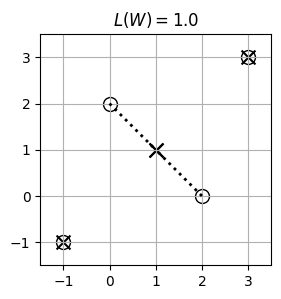

In [3]:
import numpy as np; import matplotlib.pyplot as plt; from matplotlib.collections import LineCollection
X = np.array([ [-1, -1], [0, 2], [2, 0], [3, 3] ]); N = len(X); fig, ax = plt.subplots(figsize=(3, 3))
ax.set_aspect("equal"); plt.axis([-1.5, 3.5, -1.5, 3.5]); plt.grid(True)
plt.scatter(*X.T, facecolor='white', edgecolor='k', s=100)
K = 1; W = np.array([np.sqrt(2)/2, np.sqrt(2)/2]).reshape(-1, K); Z = (X @ W).reshape(-1, K); hX = Z @ W.T
L = np.square(X - hX).sum(axis=1).mean(); ax.set_title(f'$L(W)={L}$')
plt.scatter(*hX.T, facecolor='black', s=100, marker='x')
lines = np.zeros((N, 2, 2)); lines[:, 0, :] = X; lines[:, 1, :] = hX
ax.add_collection(LineCollection(lines, linewidths=2, colors='black', linestyle='dotted'));

**Componentes principales:** $\;$ columnas de la proyección lineal ortogonal $\,\mathbf{W}\in\mathbb{R}^{D\times K}\,$ de mínima distorsión

**Cálculo de componentes principales:** $\;$ con la descomposición propia ordenada ($\lambda\text{s}$ de más a menos) de la matriz de covarianzas empírica
$$\mathbf{\Sigma}=\mathbf{U}\boldsymbol{\Lambda}\mathbf{U}^t
\quad\text{donde}\quad%
\mathbf{U}=(\boldsymbol{u}_1,\dotsc,\boldsymbol{u}_D)
\quad\text{y}\quad%
\mathbf{\Lambda}=\operatorname{diag}(\lambda_1,\dotsc,\lambda_n)%
\quad\text{con}\quad%
\lambda_1\geq\lambda_2\geq\cdots\geq\lambda_D$$

<div align="center">

**$\mathbf{W}_{\text{pca}}=(\boldsymbol{u}_1,\dotsc,\boldsymbol{u}_K)\,$ es una proyección lineal ortogonal $\,\mathbb{R}^K\,$ de mínima distorsión**

</div>

**Minimizar la distorsión equivale a maximizar la varianza (de los datos proyectados):**
* $\boldsymbol{u}_1$ es una dirección de proyección óptima para maximizar la varianza de los datos proyectados, siendo $\lambda_1$ dicha varianza
* Entre todas las direcciones ortonormales a $\boldsymbol{u}_1$, $\boldsymbol{u}_2$ y $\lambda_2$ son dirección óptima de proyección y varianza correspondiente
* Y así, sucesivamente, hasta $\boldsymbol{u}_K$ y $\lambda_K$

**Ejercicio:** $\;$ calcula $\,\mathbf{W}_{\text{pca}}\,$ con los datos del ejemplo

* **Matriz de covarianzas empírica:** $\;$ normalización de la matriz de dispersión hallada en 7.2.4, $\,\mathbf{\Sigma}=\begin{bmatrix}\frac{5}{2} & \frac{3}{2}\\[1mm]\frac{3}{2} & \frac{5}{2}\end{bmatrix}$
* **Primera componente principal:** $\;$ hallada en 7.4.3, $\,\mathbf{W}_{\text{pca}}=\boldsymbol{u}_1=(\sqrt{2}/2, \sqrt{2}/2)^t$

In [4]:
import numpy as np; X = np.array([ [-1, -1], [0, 2], [2, 0], [3, 3] ]); S = np.cov(X.T, bias=True)
La, U = np.linalg.eigh(S); i = La.argsort()[::-1]; La = La[i]; U = U[:,i]; print(U[:, 0])

[0.70710678 0.70710678]



**Principal component analysis (PCA):** $\;$ técnica de **reducción de la dimensión** que proyecta linealmente los datos en el subespacio lineal generado por los $K$ **componentes principales,** esto es, los $K$ vectores propios asociados a los $K$ mayores valores propios de $\mathbf{\Sigma}$
$$\operatorname{PCA}(\mathbf{X})=(\mathbf{X}-\mathbf{1}_N\boldsymbol{\mu}^t)\mathbf{U}_K%
\quad\text{con}\quad\mathbf{U}_K=(\boldsymbol{u}_1, \dotsc, \boldsymbol{u}_K)$$
* El centrado previo de los datos no es estrictamente necesario, aunque por lo general sí se hace
* Los datos originales pueden "reconstruirse" con $\,\tilde{\mathbf{X}}=\operatorname{PCA}(\mathbf{X})\mathbf{U}_K^t+\mathbf{1}_N\boldsymbol{\mu}^t$

**Elección de $K$:** $\;$ si se tiene $\mathbf{\Lambda}$, puede escogerse el menor $K$ que explique un cierto porcentaje (p.e. $90\%$) de la varianza total al menos
$$q_K=\frac{1}{\operatorname{tr}(\mathbf{\Sigma})}\sum_{k=1}^K\lambda_k%
\quad\text{con}\quad%
\operatorname{tr}(\mathbf{\Sigma})=\sum_{d=1}^D\lambda_d$$

En aprendizaje automático es usual encontrarnos con datos de dimensión muy elevada que, afortunadamente, puede reducirse drásticamente a cambio de reducir un poco la varianza total explicada. Por ejemplo, en clasificación de imágenes, muchas variables corresponden a píxeles que varían muy poco o nada ($\lambda$ prácticamente nulo), por lo que pueden ignorarse sin efectos negativos significativos; al contrario, la reducción de la dimensión suele facilitar el desarrollo de sistemas precisos.

In [5]:
import numpy as np
X = np.array([ [-1, -1], [0, 2], [2, 0], [3, 3] ]).astype(float)
m = np.mean(X, axis=0)
S = np.cov(X.T, bias=True)
La, U = np.linalg.eigh(S)
i = La.argsort()[::-1]; La = La[i]; U = U[:,i]
Xr = (X - m) @ U[:,0]
print("Datos centrados:\n", X - m, "\nComponente principal 1:\n", U[:,0], "\nDatos reducidos:\n", Xr)
q1 = La[0]
print("Varianza explicada: ", q1, "\nCalidad de la proyección (%): ", 100.0 * q1/np.sum(La))

Datos centrados:
 [[-2. -2.]
 [-1.  1.]
 [ 1. -1.]
 [ 2.  2.]] 
Componente principal 1:
 [0.70710678 0.70710678] 
Datos reducidos:
 [-2.82842712  0.          0.          2.82842712]
Varianza explicada:  4.0 
Calidad de la proyección (%):  80.0


**Blanqueado PCA:** $\;$ PCA con $K=D$ y postnormalización de varianzas con $\mathbf{\Lambda}^{-1/2}$
